# Predicting heart disease using Machine Learning (Classification)
## 1. Problem Definition
- clinical parameters about patient
- predict cholestrol or not 
## 2. Data
create data dictionary
## 3.Evaluation 
if we reach 95% accuracy
## 4.features 


## Preparing the tools

In [51]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder 
plt.style.use('ggplot')

## Load Data

In [12]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Date Exploration (EDA)
1. what kind of data
2. what's missing how to deal with it
3. outliers ?
4. edit features

In [17]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

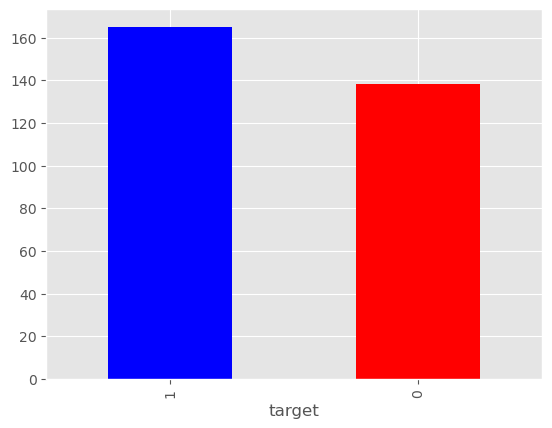

In [52]:
df['target'].value_counts().plot(kind='bar',color=['blue','red']);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency to Sex

In [28]:
df.sex.value_counts()# 1 = male | 0 = Female

sex
1    207
0     96
Name: count, dtype: int64

In [29]:
# Compare target with sex 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


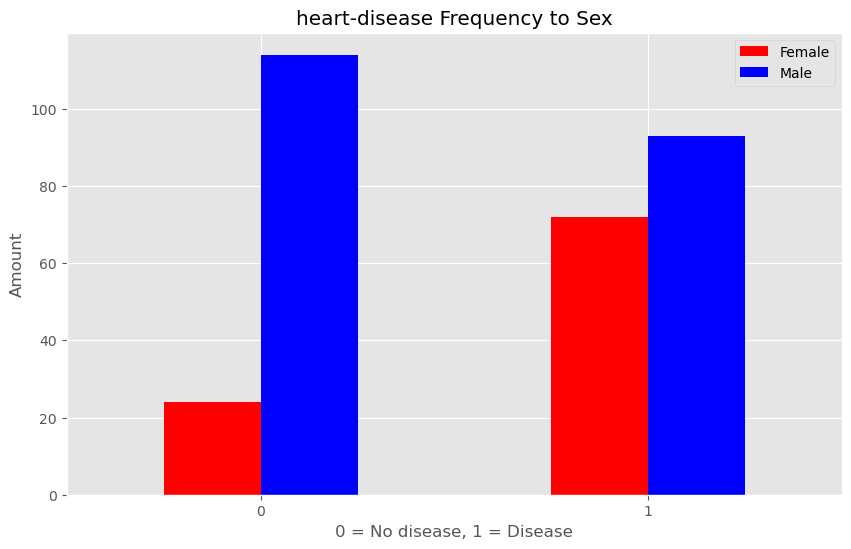

In [53]:
pd.crosstab(df.target, df.sex).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.title('heart-disease Frequency to Sex')
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

### Age vs Max Heart rate for heart disease

In [34]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

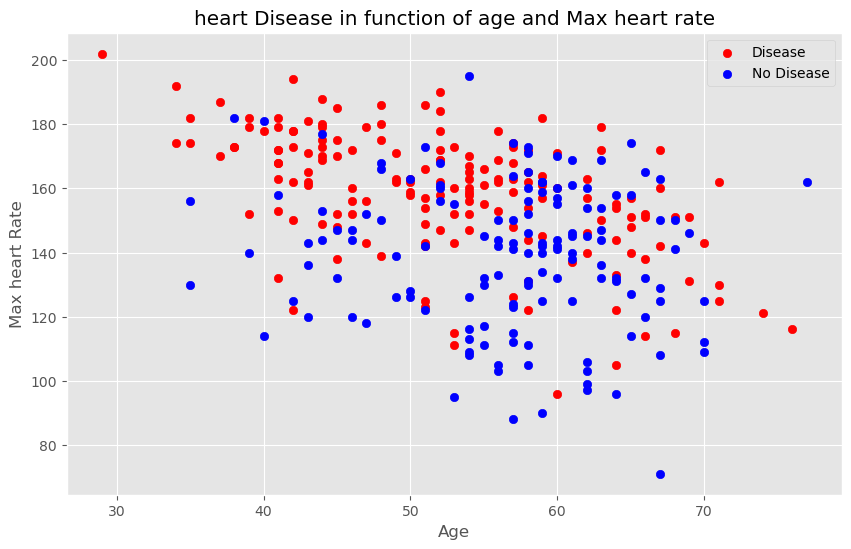

In [54]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],color=['red'])

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],color=['blue'])

plt.title('heart Disease in function of age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart Rate')
plt.legend(['Disease','No Disease']);

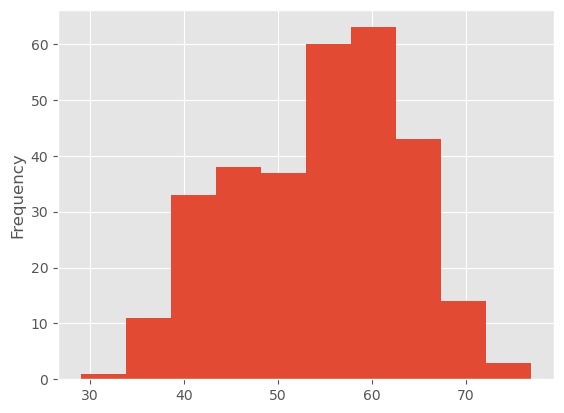

In [55]:
# Age distribution 
df.age.plot.hist(bins=10);

### Heart Disesase Frequency per Chest Pain Type

In [48]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


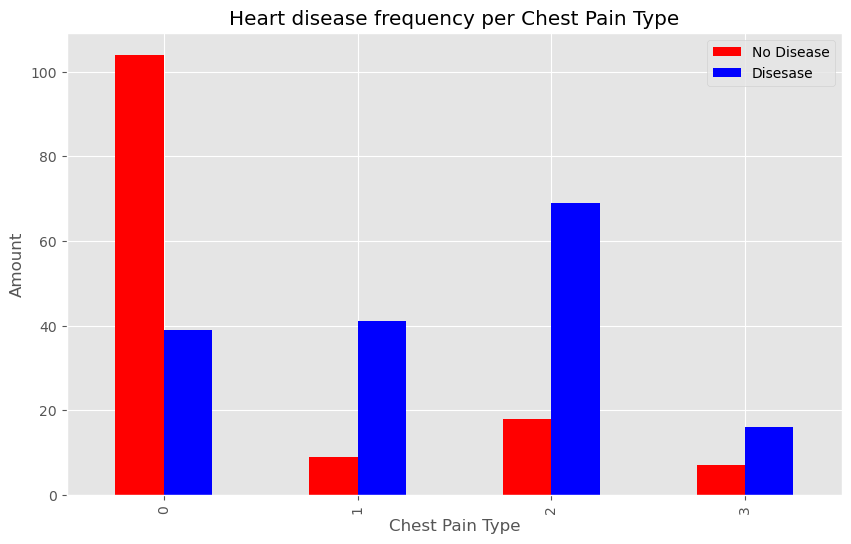

In [56]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.title('Heart disease frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disesase'])
plt.yticks(rotation=0);

In [57]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


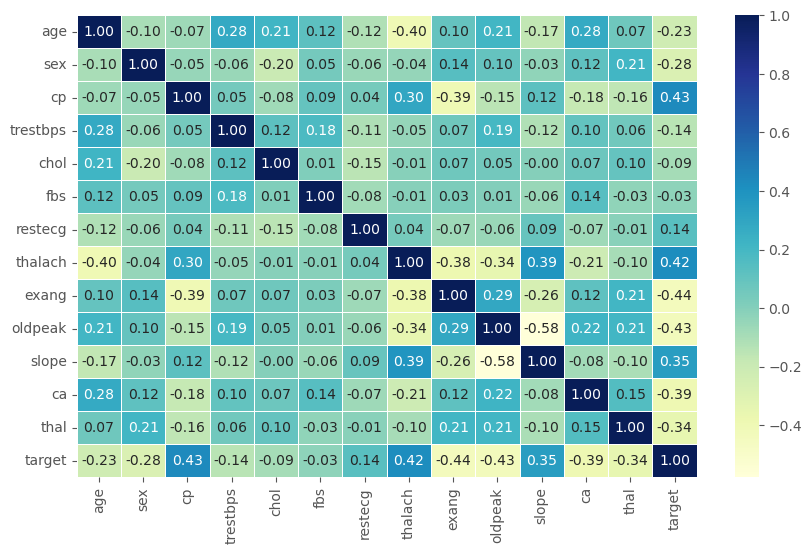

In [62]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')


## Modelling

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
X = df.drop('target',axis=1)
y = df['target']

In [68]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [90]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, len(y_train)

((242, 13), (61, 13), (242,), 242)

In [92]:
# Put models in a dictionary 
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}
# fit and score model 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        # Fit model to training data
        model.fit(X_train,y_train)
        # Evaluate model 
        model_scores[name] = model.score(X_test,y_test)
    return model_scores 

In [95]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

c:\Users\andre\conda\heart-disease-project\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

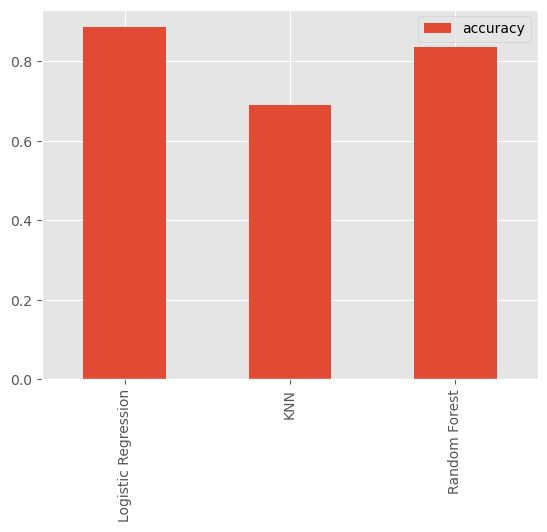

In [98]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter tuning

In [107]:
train_scores = []
test_scores = []

neighbors = range(1,31)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [113]:
test_scores[:7]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853]

Maximum KNN score on the test data:75.41%


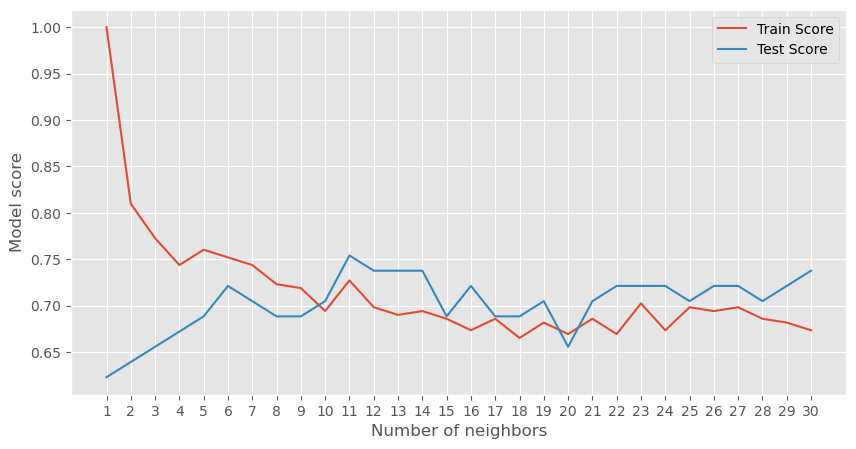

In [115]:
plt.figure(figsize=(10,5))
plt.plot(neighbors, train_scores,label='Train Score')
plt.plot(neighbors, test_scores,label='Test Score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with randomizedsearchedcv

In [124]:
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

rf_grids = {'n_estimators':np.arange(10,1000,50),
            'max_depth':[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}

In [119]:
# Tune Logistic Regression 

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [120]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [121]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [125]:
#Logistic Regression
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grids,
                           cv=5,n_iter=20,verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [126]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [127]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [128]:
model_scores    

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## HyperParameter  Tuning with GridSearchCV

In [131]:
log_reg_grid ={'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [132]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating 




In [134]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

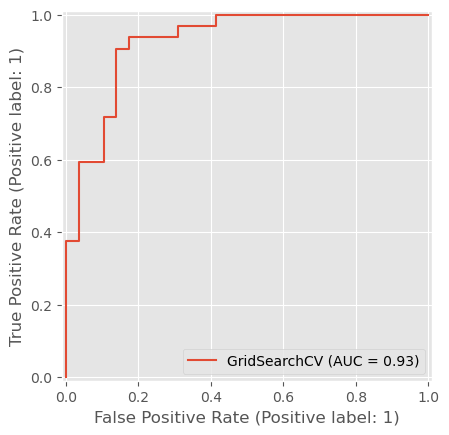

In [138]:
# ROC and AUC 
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

<Axes: >

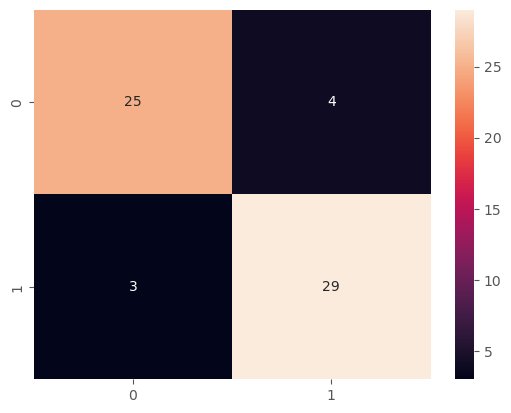

In [144]:
# Confusion matrix

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [146]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation using cross-validation

In [153]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [156]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')


In [160]:
cross_val_accuracy = np.mean(cross_val_score(clf,X,y,cv=5,scoring='accuracy'))
cross_val_accuracy

0.8446994535519124

In [168]:
cross_val_recall = np.mean(cross_val_score(clf,X,y,cv=5,scoring='recall'))
cross_val_recall

0.9212121212121213

In [166]:
cross_val_precision = np.mean(cross_val_score(clf,X,y,cv=5,scoring='precision'))
cross_val_precision

0.8207936507936507

In [162]:
cross_val_f1 = np.mean(cross_val_score(clf,X,y,cv=5,scoring='f1'))
cross_val_f1

0.8673007976269721

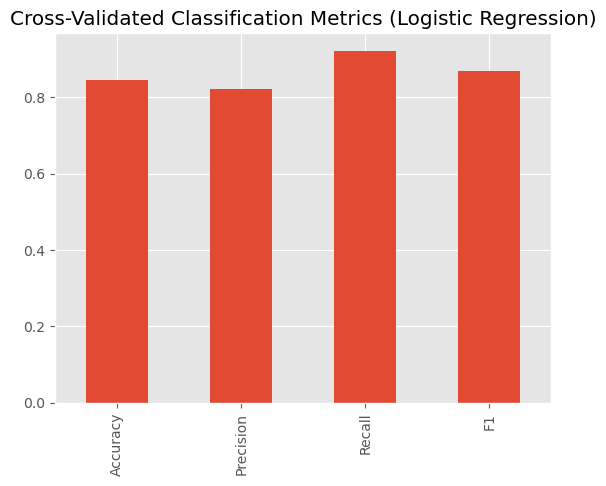

In [176]:
cv_metrics = pd.DataFrame({'Accuracy':cross_val_accuracy,
                           'Precision':cross_val_precision,
                           'Recall':cross_val_recall,
                           'F1':cross_val_f1},
                           index=[0])
cv_metrics.T.plot(kind='bar',title='Cross-Validated Classification Metrics (Logistic Regression)',legend=False);

### Feature Importance

In [181]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(X_train,y_train);

In [183]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [182]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [185]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

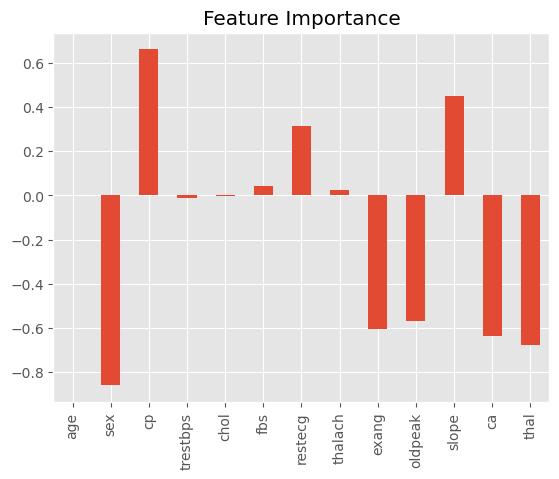

In [187]:
# Visualization 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',title='Feature Importance',legend=False);

In [194]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [196]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope = the peak of excercise ST segment
* 0 (Upsloping)   : uncommon(better heart rate with excercise)
* 1 (Flatslopiong): healthy heart(minimal change)
* 2 (Downsloping) : sign of unhealty heart